In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(keras.__version__)

1.13.1
2.2.4-tf


In [2]:
tf.enable_eager_execution()

In [3]:
def MinMaxScaler(data):
    ''' Min Max Normalization
    Parameters
    ----------
    data : numpy.ndarray
        input data to be normalized
        shape: [Batch size, dimension]
    Returns
    ----------
    data : numpy.ndarry
        normalized data
        shape: [Batch size, dimension]
    References
    ----------
    .. [1] http://sebastianraschka.com/Articles/2014_about_feature_scaling.html
    '''
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [4]:
# train Parameters
seq_length = 7
data_dim = 5
hidden_size = 10
output_dim = 1
learning_rate = 0.001
training_epochs = 500
batch_size = 25

In [5]:
# Open, High, Low, Volume, Close
xy = np.loadtxt('/content/gdrive/My Drive/TensorFlow_Training_12th/data/data-02-stock_daily.csv', delimiter=',')
#xy = np.loadtxt('./data/data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]  # reverse order (chronically ordered)
xy = MinMaxScaler(xy).astype(np.float32)
x = xy
y = xy[:, [-1]]  # Close as label

In [6]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next close price
    print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[2.1375105e-01 2.0817982e-01 1.9179183e-01 4.6607511e-04 1.9209240e-01]
 [1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]] -> [0.13289961]
[[1.9393504e-01 2.0364192e-01 2.0866457e-01 2.9846733e-03 1.9655156e-01]
 [2.1051645e-01 2.0528941e-01 2.0355874e-01 2.5992651e-04 1.8774973e-01]
 [1.8667877e-01 2.0948057e-01 2.0878184e-01 0.0000000e+00 2.1744815e-01]
 [3.0697387e-01 3.1463414e-01 2.1899366e-01 1.2476472e-02 2.1698189e-01]
 [2.1914211e-01 2.6390722e-01 2.2468640e-01 4.5632339e-01 2.2496748e-01]
 [2.3312993e-01 2.3641916e-01 1.6268273e-01 5.7017118e-01 1.4744274e-01]
 [1.3431200e-01 1.5175878e-01 1.16

 [0.10301437 0.11796966 0.11940034 0.0893699  0.12689576]] -> [0.14957038]
[[0.15205896 0.15615213 0.157078   0.14420544 0.14656836]
 [0.13623536 0.14311641 0.1465729  0.12952407 0.13741691]
 [0.12644382 0.13623723 0.14804    0.08794479 0.14665575]
 [0.14127685 0.1380871  0.14155507 0.12874429 0.13523114]
 [0.12064469 0.11695513 0.12280434 0.1299543  0.11471322]
 [0.10301437 0.11796966 0.11940034 0.0893699  0.12689576]
 [0.12020772 0.1452265  0.14051326 0.16294703 0.14957038]] -> [0.18340723]
[[0.13623536 0.14311641 0.1465729  0.12952407 0.13741691]
 [0.12644382 0.13623723 0.14804    0.08794479 0.14665575]
 [0.14127685 0.1380871  0.14155507 0.12874429 0.13523114]
 [0.12064469 0.11695513 0.12280434 0.1299543  0.11471322]
 [0.10301437 0.11796966 0.11940034 0.0893699  0.12689576]
 [0.12020772 0.1452265  0.14051326 0.16294703 0.14957038]
 [0.14150995 0.17389944 0.15828109 0.20647128 0.18340723]] -> [0.19191742]
[[0.12644382 0.13623723 0.14804    0.08794479 0.14665575]
 [0.14127685 0.138087

 [0.11139998 0.1477917  0.13157108 0.19706014 0.15737382]] -> [0.19977905]
[[0.07240915 0.08460739 0.09225036 0.11406292 0.08833046]
 [0.08298739 0.08729545 0.08104102 0.1424487  0.09462577]
 [0.07692599 0.07733515 0.08376997 0.11551493 0.07075641]
 [0.08295822 0.08032964 0.0962117  0.16415703 0.08197697]
 [0.09219591 0.10573628 0.1114705  0.1746706  0.10951857]
 [0.11139998 0.1477917  0.13157108 0.19706014 0.15737382]
 [0.15184787 0.20195511 0.17356203 0.29006004 0.19977905]] -> [0.19721432]
[[0.08298739 0.08729545 0.08104102 0.1424487  0.09462577]
 [0.07692599 0.07733515 0.08376997 0.11551493 0.07075641]
 [0.08295822 0.08032964 0.0962117  0.16415703 0.08197697]
 [0.09219591 0.10573628 0.1114705  0.1746706  0.10951857]
 [0.11139998 0.1477917  0.13157108 0.19706014 0.15737382]
 [0.15184787 0.20195511 0.17356203 0.29006004 0.19977905]
 [0.19080952 0.20384541 0.20314042 0.15924531 0.19721432]] -> [0.25442502]
[[0.07692599 0.07733515 0.08376997 0.11551493 0.07075641]
 [0.08295822 0.080329

 [0.5939476  0.60612386 0.6057664  0.12670073 0.6198681 ]] -> [0.6419597]
[[0.65377444 0.6475146  0.65858525 0.14529891 0.65953374]
 [0.65284187 0.64592487 0.6410377  0.17478713 0.64079386]
 [0.6420888  0.6373692  0.6410377  0.17605092 0.63633484]
 [0.6185137  0.6130927  0.58493245 0.2668459  0.5904904 ]
 [0.56515634 0.600661   0.5803548  0.18539034 0.5870222 ]
 [0.5939476  0.60612386 0.6057664  0.12670073 0.6198681 ]
 [0.6220689  0.63722473 0.6332322  0.25325805 0.6419597 ]] -> [0.682762]
[[0.65284187 0.64592487 0.6410377  0.17478713 0.64079386]
 [0.6420888  0.6373692  0.6410377  0.17605092 0.63633484]
 [0.6185137  0.6130927  0.58493245 0.2668459  0.5904904 ]
 [0.56515634 0.600661   0.5803548  0.18539034 0.5870222 ]
 [0.5939476  0.60612386 0.6057664  0.12670073 0.6198681 ]
 [0.6220689  0.63722473 0.6332322  0.25325805 0.6419597 ]
 [0.6566885  0.6675162  0.6736239  0.17593439 0.682762  ]] -> [0.693458]
[[0.6420888  0.6373692  0.6410377  0.17605092 0.63633484]
 [0.6185137  0.6130927  0.

 [0.7943803  0.79189056 0.7965891  0.1734606  0.7856713 ]] -> [0.78535074]
[[0.89273155 0.8888348  0.89186823 0.24570225 0.8824893 ]
 [0.91415024 0.92351973 0.8980012  0.38200232 0.8825476 ]
 [0.8766164  0.86967134 0.8698604  0.21685041 0.8509841 ]
 [0.83995706 0.84836906 0.84503555 0.21497715 0.84827363]
 [0.82628983 0.8257084  0.809559   0.16711481 0.8048193 ]
 [0.7943803  0.79189056 0.7965891  0.1734606  0.7856713 ]
 [0.7460351  0.7930755  0.7717377  0.19063368 0.78535074]] -> [0.845097]
[[0.91415024 0.92351973 0.8980012  0.38200232 0.8825476 ]
 [0.8766164  0.86967134 0.8698604  0.21685041 0.8509841 ]
 [0.83995706 0.84836906 0.84503555 0.21497715 0.84827363]
 [0.82628983 0.8257084  0.809559   0.16711481 0.8048193 ]
 [0.7943803  0.79189056 0.7965891  0.1734606  0.7856713 ]
 [0.7460351  0.7930755  0.7717377  0.19063368 0.78535074]
 [0.8155076  0.83594036 0.83626175 0.14136417 0.845097  ]] -> [0.86838347]
[[0.8766164  0.86967134 0.8698604  0.21685041 0.8509841 ]
 [0.83995706 0.84836906

In [7]:
# train/test split
train_size = int(len(dataY) * 0.7 + 18)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(
    dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(
    dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)
print(testX.shape, testX.shape)

(525, 7, 5) (525, 1)
(200, 7, 5) (200, 7, 5)


In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).shuffle(
                buffer_size=1000).prefetch(buffer_size=batch_size).batch(batch_size)
train_dataset = tf.data.Dataset.from_tensor_slices((trainX, trainY)).prefetch(
                buffer_size=batch_size).batch(batch_size)

In [9]:
def create_model():
    model = keras.Sequential()
    model.add(keras.layers.CuDNNLSTM(units=hidden_size, return_sequences=True,
                                     input_shape=(trainX.shape[1],trainX.shape[2])))
    model.add(keras.layers.CuDNNLSTM(units=hidden_size))
    model.add(keras.layers.Dense(units=output_dim))
    return model

In [10]:
model = create_model()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm (CuDNNLSTM)       (None, 7, 10)             680       
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 10)                880       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [11]:
def loss_fn(model, dataX, dataY):
    logits = model(dataX, training=True)
    loss = tf.reduce_mean(tf.square(dataY - logits))    
    return loss 

In [12]:
def grad(model, dataX, dataY):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, dataX, dataY)
    return tape.gradient(loss, model.variables)

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [14]:
# train my model
print('Learning started. It takes sometime.')
for epoch in range(training_epochs):
    avg_loss = 0.    
    train_step = 0    
    
    for X, Y in train_dataset:
        grads = grad(model, X, Y)                
        optimizer.apply_gradients(zip(grads, model.variables))
        loss = loss_fn(model, X, Y)        
        avg_loss = avg_loss + loss        
        train_step += 1
    avg_loss = avg_loss / train_step
    
    if (epoch+1) % 10 == 0:
        print('Epoch:', '{}'.format(epoch + 1), 'loss =', '{:.8f}'.format(avg_loss))          

print('Learning Finished!')

Learning started. It takes sometime.
Epoch: 10 loss = 0.00271773
Epoch: 20 loss = 0.00261289
Epoch: 30 loss = 0.00248239
Epoch: 40 loss = 0.00229085
Epoch: 50 loss = 0.00209940
Epoch: 60 loss = 0.00194309
Epoch: 70 loss = 0.00181955
Epoch: 80 loss = 0.00171792
Epoch: 90 loss = 0.00162944
Epoch: 100 loss = 0.00154849
Epoch: 110 loss = 0.00147182
Epoch: 120 loss = 0.00139789
Epoch: 130 loss = 0.00132651
Epoch: 140 loss = 0.00125841
Epoch: 150 loss = 0.00119501
Epoch: 160 loss = 0.00113829
Epoch: 170 loss = 0.00109044
Epoch: 180 loss = 0.00105258
Epoch: 190 loss = 0.00102334
Epoch: 200 loss = 0.00099994
Epoch: 210 loss = 0.00098067
Epoch: 220 loss = 0.00096412
Epoch: 230 loss = 0.00094977
Epoch: 240 loss = 0.00093652
Epoch: 250 loss = 0.00092501
Epoch: 260 loss = 0.00091332
Epoch: 270 loss = 0.00090351
Epoch: 280 loss = 0.00089630
Epoch: 290 loss = 0.00087071
Epoch: 300 loss = 0.00095883
Epoch: 310 loss = 0.00088558
Epoch: 320 loss = 0.00087856
Epoch: 330 loss = 0.00083897
Epoch: 340 loss

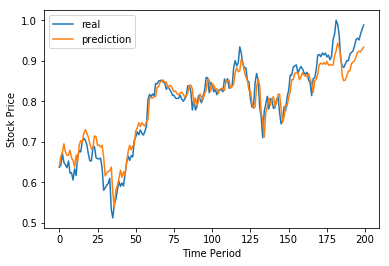

In [15]:
test_predict = model(testX, training=False).numpy()
plt.plot(testY)
plt.plot(test_predict)
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend(['real', 'prediction'])
plt.show()